In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import itertools

In [2]:
df = pd.read_csv('observations.csv')
df[df['scientific_name'] == 'Myotis lucifugus']

,scientific_name,park_name,observations
1603,Myotis lucifugus,Great Smoky Mountains National Park,57
7094,Myotis lucifugus,Yellowstone National Park,239
8308,Myotis lucifugus,Great Smoky Mountains National Park,59
9318,Myotis lucifugus,Bryce National Park,103
9738,Myotis lucifugus,Yosemite National Park,124
10759,Myotis lucifugus,Bryce National Park,108
11395,Myotis lucifugus,Great Smoky Mountains National Park,58
12562,Myotis lucifugus,Yellowstone National Park,233
13611,Myotis lucifugus,Yosemite National Park,134
15865,Myotis lucifugus,Bryce National Park,87


In [3]:
df1 = pd.read_csv('species_info.csv')
df1.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [34]:
scientific_name = df['scientific_name'].value_counts()

In [5]:
df2 = pd.merge(df.drop_duplicates('scientific_name'), df1.drop_duplicates('scientific_name'), on=['scientific_name'])
df2[df2['scientific_name'] == 'Myotis lucifugus']
print(len(df2))

5541


In [6]:
df3 = df.merge(df1.drop_duplicates('scientific_name'), on='scientific_name', how='left')
df3['observations'].to_numpy()
print(len(df3))

23296


In [7]:
df3[df3['scientific_name'] == 'Myotis lucifugus']

,scientific_name,park_name,observations,category,common_names,conservation_status
1603,Myotis lucifugus,Great Smoky Mountains National Park,57,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
7094,Myotis lucifugus,Yellowstone National Park,239,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
8308,Myotis lucifugus,Great Smoky Mountains National Park,59,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
9318,Myotis lucifugus,Bryce National Park,103,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
9738,Myotis lucifugus,Yosemite National Park,124,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
10759,Myotis lucifugus,Bryce National Park,108,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
11395,Myotis lucifugus,Great Smoky Mountains National Park,58,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
12562,Myotis lucifugus,Yellowstone National Park,233,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
13611,Myotis lucifugus,Yosemite National Park,134,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
15865,Myotis lucifugus,Bryce National Park,87,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern


In [8]:
df_group = df3.groupby(['category', 'conservation_status', 'park_name'])['observations'].sum().reset_index()
df_group['park_name'] = df_group['park_name'].replace({'Great Smoky Mountains National Park':'Great Smoky N.P.'})
df_group

,category,conservation_status,park_name,observations
0,Amphibian,Endangered,Bryce National Park,31
1,Amphibian,Endangered,Great Smoky N.P.,11
2,Amphibian,Endangered,Yellowstone National Park,60
3,Amphibian,Endangered,Yosemite National Park,42
4,Amphibian,Species of Concern,Bryce National Park,387
...,...,...,...,...
63,Vascular Plant,Species of Concern,Yosemite National Park,5794
64,Vascular Plant,Threatened,Bryce National Park,99
65,Vascular Plant,Threatened,Great Smoky N.P.,81
66,Vascular Plant,Threatened,Yellowstone National Park,228


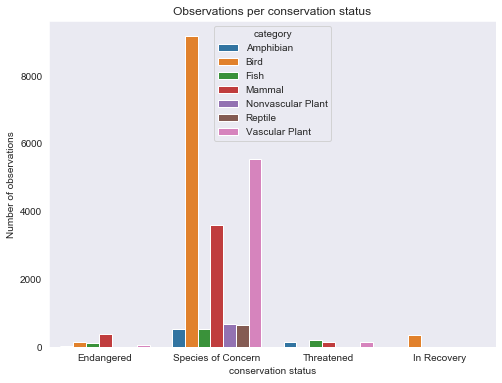

In [9]:
plt.figure(figsize=(8,6))
sns.set_style('dark')

ax = sns.barplot(x=df_group['conservation_status'], y=df_group['observations'], hue=df_group['category'], ci=None)
ax.set(ylabel='Number of observations', xlabel='conservation status', title='Observations per conservation status')
plt.show()   

In [10]:
endangered = df_group[df_group['conservation_status'] == 'In Recovery']
end_piv = endangered.pivot(index='park_name', columns='category', values='observations')
end_piv_1 = end_piv.reset_index()
endangered

,category,conservation_status,park_name,observations
16,Bird,In Recovery,Bryce National Park,258
17,Bird,In Recovery,Great Smoky N.P.,189
18,Bird,In Recovery,Yellowstone National Park,559
19,Bird,In Recovery,Yosemite National Park,386


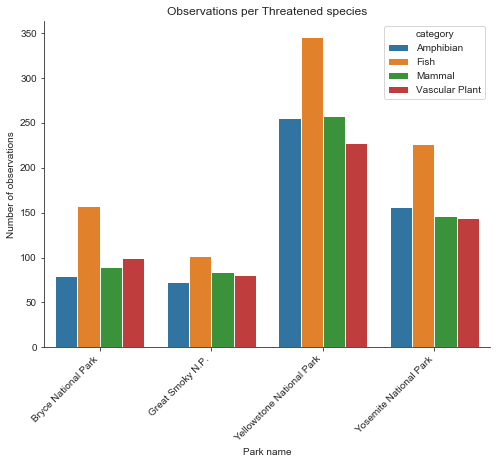

None


In [11]:
def conservation(cons_stat):
    conserv_stat = df_group[df_group['conservation_status'] == cons_stat]
    
    plt.figure(figsize=(8,6))
    sns.set_style('ticks')
    
    ax=sns.barplot(x=conserv_stat['park_name'], y=conserv_stat['observations'], hue=conserv_stat['category'])
    ax.set(xlabel='Park name', ylabel='Number of observations', title='Observations per '+str(cons_stat)+' species')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    sns.despine()
    return plt.show()

print(conservation('Threatened'))

In [12]:
con_stat_lst = []
for x in df_group['conservation_status'].unique():
    con_stat_lst.append(x)
print(con_stat_lst)

['Endangered', 'Species of Concern', 'Threatened', 'In Recovery']


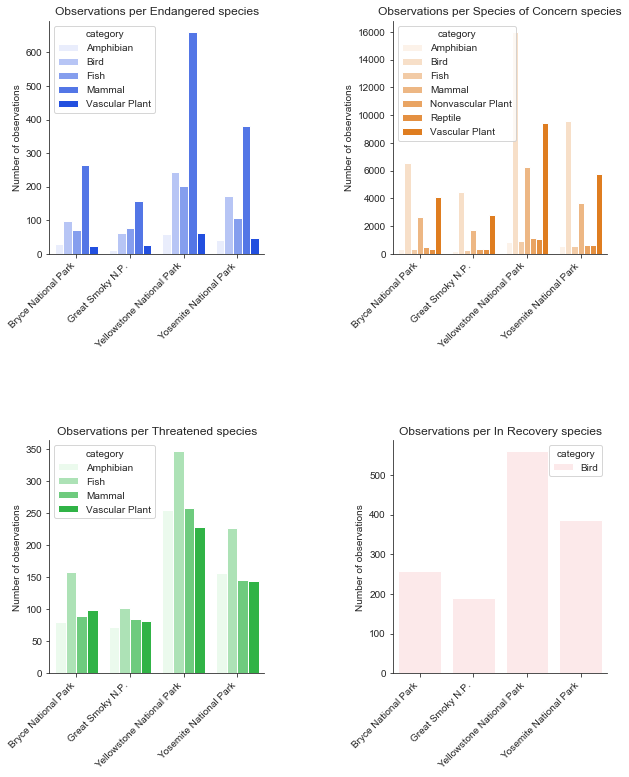

None


In [13]:
fig = plt.figure(figsize=(10,12))
sns.set_style('ticks')

def con_stat(conserv_stat):
    
    palette = itertools.cycle(sns.color_palette('bright', 10))
    
    for i in range(1, len(con_stat_lst)+1):
        ax=fig.add_subplot(2, 2, i)
        conserv = df_group[df_group['conservation_status'] == conserv_stat[i-1]]
        c = next(palette)
        ax=sns.barplot(x=conserv['park_name'], y=conserv['observations'], hue=conserv['category'], color=c)
        ax.set(xlabel='',ylabel='Number of observations', title='Observations per '+str(con_stat_lst[i-1])+' species')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
        plt.subplots_adjust(wspace=0.6)
        plt.subplots_adjust(hspace=0.8)
        sns.despine()
    return plt.show() 

print(con_stat(con_stat_lst))
    

In [14]:
df1['conservation_status'].fillna('No Intervention', inplace=True)

In [15]:
df_category = df1[df1['conservation_status'] != 'No Intervention']\
    .groupby(['conservation_status', 'category'])['scientific_name']\
    .count()\
    .unstack()

df_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


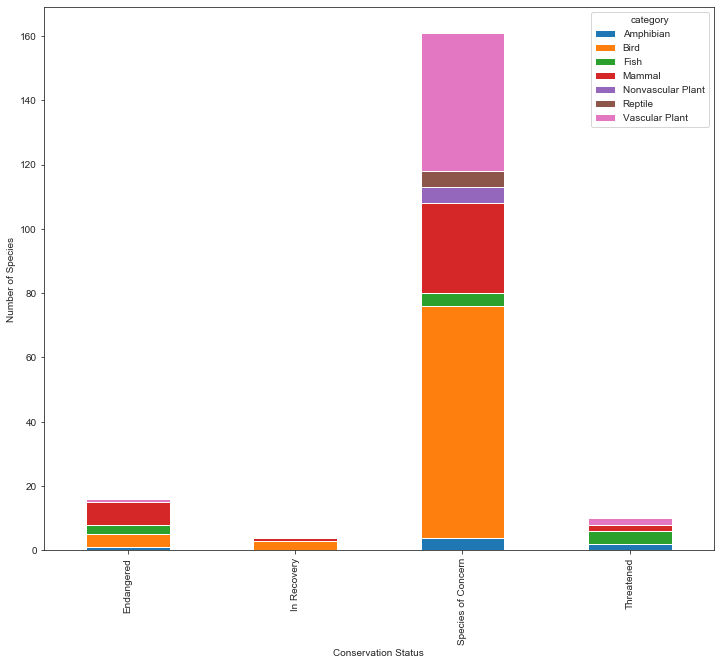

In [16]:
ax = df_category.plot(kind = 'bar', figsize=(12,10), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")
plt.show()

In [17]:
df1['is_protected'] = df1['conservation_status'] != 'No Intervention'
df1

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False
...,...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,No Intervention,False
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",No Intervention,False
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",No Intervention,False
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No Intervention,False


In [18]:
df_counts = df1.groupby(['category', 'is_protected'])['scientific_name'].nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
df_counts.columns = ['category', 'not_protected', 'protected']

df_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [19]:
df_counts['percent_protected'] = df_counts['protected'] / \
                                      (df_counts['protected'] + df_counts['not_protected'])
df_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,0.088608
1,Bird,413,75,0.153689
2,Fish,115,11,0.087302
3,Mammal,146,30,0.170455
4,Nonvascular Plant,328,5,0.015015
5,Reptile,73,5,0.064103
6,Vascular Plant,4216,46,0.010793


In [20]:
contingency = df_counts.iloc[:, :-1]
contingency.set_index('category', inplace = True)
contingency_final_1 = contingency.loc[['Bird', 'Mammal']]
contingency_final_1

,not_protected,protected
category,,
Bird,413,75
Mammal,146,30


In [21]:
from scipy.stats import chi2_contingency

contingency1 = [[413, 75],
              [146, 30]]
chi2_contingency(contingency1)

(0.16170148316545574, 0.6875948096661336, 1, array([[410.8313253,  77.1686747],
        [148.1686747,  27.8313253]]))

In [22]:
contingency = df_counts.iloc[:, :-1]
contingency.set_index('category', inplace = True)
contingency_final_2 = contingency.loc[['Reptile', 'Mammal']]
contingency_final_2

,not_protected,protected
category,,
Reptile,73,5
Mammal,146,30


In [23]:
contingency2 = [[73, 5],
              [146, 30]]
chi2_contingency(contingency2)

(4.289183096203645, 0.03835559022969898, 1, array([[ 67.2519685,  10.7480315],
        [151.7480315,  24.2519685]]))

In [24]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_names = df1[df1['category'] == "Mammal"]['common_names'].apply(remove_punctuations)\
    .str.split().tolist()

common_names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [25]:
clean_rows = []

for item in common_names:
    item = list(dict.fromkeys(item))
    clean_rows.append(item)
    
clean_rows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [26]:
res = list(chain.from_iterable(clean_rows))
res[:6]
print(len(res))

547


In [27]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))
print(len(words_counted))
pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

547


,Word,Count
54,Bat,23
47,Shrew,18
140,Myotis,17
104,Mouse,16
94,Chipmunk,13
6,American,12
73,Squirrel,12
167,Vole,11
19,Eastern,11
160,Mountain,10


In [28]:
df1['is_bat'] = df1['common_names'].str.contains(r"\bBat\b", regex = True)

df1.head(50)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


In [29]:
df1[df1['is_bat']==True]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


In [30]:
bat_observ = df.merge(df1[df1['is_bat']==True])
bat_observ

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


In [31]:
bat_observ_gen = bat_observ.groupby('park_name')['observations'].sum().reset_index()
bat_observ_gen.sort_values('observations', ascending=False)

,park_name,observations
2,Yellowstone National Park,8362
3,Yosemite National Park,4786
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411


In [32]:
obs_by_park = bat_observ.groupby(['park_name', 'is_protected'])['observations'].sum().reset_index()

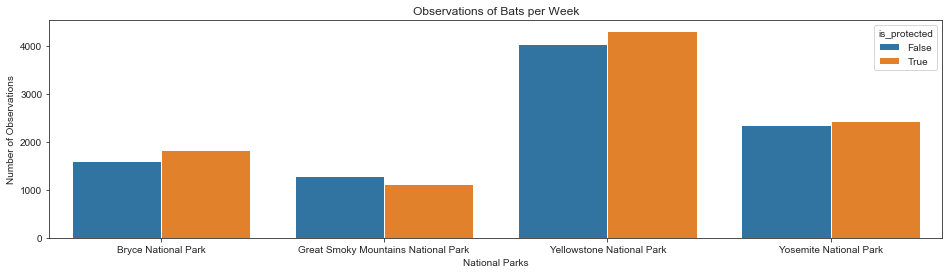

In [33]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park['park_name'], y= obs_by_park['observations'], \
            hue=obs_by_park['is_protected'])
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()